In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def baker_map(x):
    """
    Defines the Baker map
    """
    mat1 = np.array([0.5, 2])
    mat2 = np.array([0.5, -1])
    
    if x[1]>0:
        return mat1*x+mat2
    else:
        return mat1*x-mat2
    
def baker_rotated_map(x):
    """
    Rotated Baker map
    """
    
    mat1 = np.array([[5.0/4.0, -3/4.0],[-3/4.0, 5.0/4.0]])
    vec = np.dot(mat1, x)
    mat2 = np.array([3/np.sqrt(8), -1/np.sqrt(8)])
    if x[1]>x[0]:
        return vec + mat2
    else:
        return vec - mat2
    
def unrotate(x):
    """
    transforms a rotated point into a regular Baker map
    """
    return np.array([(x[1]+x[0])/np.sqrt(2), (x[1]-x[0])/np.sqrt(2)])

In [6]:
ini_point = np.array([1/np.sqrt(2), 1/np.sqrt(3)])

In [7]:
num_pnts = 100
z_val = ini_point
res_baker = np.zeros([num_pnts, 2])
for ind in range(num_pnts):
    y_val = baker_map(z_val)
    z_val = y_val
    res_baker[ind] = y_val

Let us plot the series and see where they converge to..

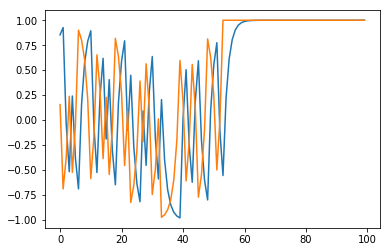

In [8]:
plt.plot(res_baker)
plt.show()

Thus, it converges to (1,1), which is one of the fixed points. 

This result is actually WRONG!!!!! 

Let us analyze in more detail.

Let us analyze the rotated Baker map

In [6]:
ini_pointa = np.array([0.5, 0.0])
ini_pointb = np.array([0.5 + 1e-6, 0.0])

In [10]:
num_pnts = 200
z_a = ini_pointa
z_b = ini_pointb
v_points_a = np.zeros([num_pnts, 2])
v_points_b = np.zeros([num_pnts, 2])
for n in range(num_pnts):
    y_a = baker_rotated_map(z_a)
    z_a = y_a
    v_points_a[n] = y_a
    
    y_b = baker_rotated_map(z_b)
    z_b = y_b
    v_points_b[n] = y_b

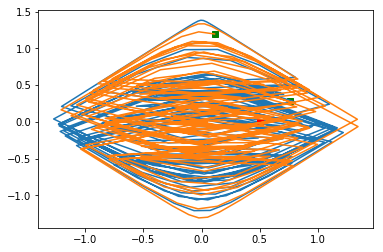

[ 0.75790517  0.28207695]
[ 0.1118039   1.19589459]


In [11]:
plt.plot(v_points_a[-1][0],v_points_a[-1][1], 'gs')
plt.plot(ini_pointa[0],ini_pointa[1], 'rs')
plt.plot(v_points_a[:, 0], v_points_a[:, 1])

plt.plot(v_points_b[-1][0],v_points_b[-1][1], 'gs')
plt.plot(ini_pointb[0],ini_pointb[1], 'rs')
plt.plot(v_points_b[:, 0], v_points_b[:, 1])

plt.show()
print(v_points_a[-1])
print(v_points_b[-1])

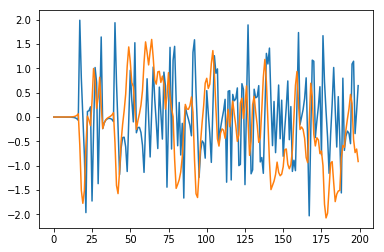

In [12]:
plt.plot(v_points_a-v_points_b)
plt.show()

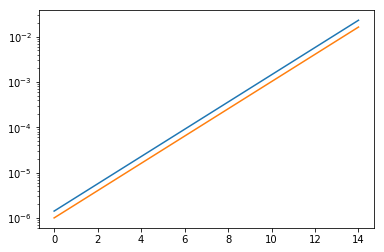

In [13]:
num_end = 15
plt.semilogy(np.arange(num_end), unrotate(v_points_a.T)[1, :num_end]-unrotate(v_points_b.T)[1, :num_end])
plt.semilogy(np.arange(num_end), 1e-6*2**(np.arange(num_end)))
plt.show()

The Lyapunov exponent is indeed $\ln(2)$